# Supervised learning - Regression

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
# Linear regression
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\tak_jj\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [7]:
data = boston.data
label = boston.target
columns = boston.feature_names

bostonFrame = pd.DataFrame(data, columns=columns)
print(bostonFrame.head())
print(bostonFrame.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
(506, 13)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(bostonFrame, label, train_size=0.8, random_state=2022)

In [10]:
# Simple Linear regression

print(X_train['RM'].shape)

(404,)


In [12]:
RM_train = X_train['RM'].values.reshape(-1,1) #Because sklearn cannot use 1-D data for train, reshape data

print(RM_train.shape)

(404, 1)


In [13]:
sim_lr.fit(RM_train, y_train)

y_pred = sim_lr.predict(X_test['RM'].values.reshape(-1,1))

In [14]:
# evaluation
from sklearn.metrics import r2_score

print("Simple linear regreesion, R2: {:.4f}".format(r2_score(y_test, y_pred)))

Simple linear regreesion, R2: 0.2121


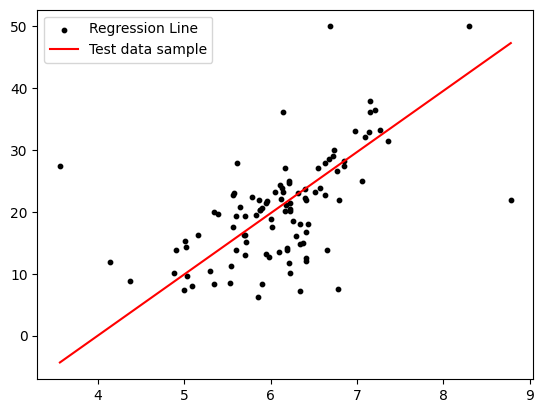

In [15]:
line_x = np.linspace(np.min(X_test['RM']), np.max(X_test['RM']), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_test['RM'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red')
plt.legend(['Regression Line', 'Test data sample'], loc='upper left')

plt.show()